## MIMIC-III Discharge summaries statistics

In [1]:
## Need to find a better solution to import packages from other directory

import os, sys
sys.path.append(os.path.dirname(os.path.dirname(os.path.realpath('MIMIC_preprocessing.py'))))

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re

import utils 
import model_functions as fun

from constants import DATA_DIR

%matplotlib inline

In [48]:
# Load MIMIC data

df_mimic = pd.read_pickle(DATA_DIR+'mimic3_data.pkl')

# Get ICDs
hist_mimic = utils.make_icds_histogram(df_mimic)
all_icds_mimic = hist_mimic.index.tolist()

print('Total Discharge Summaries and unique HADM_IDs selected:', df_mimic.shape[0])
# Note that column names were changed to match HSL columns

Total Discharge Summaries and unique HADM_IDs selected: 52722


In [21]:
## Apply preprocessor

df_mimic['TEXT'] = df_mimic.TEXT.apply(utils.preprocessor_word2vec)

###### Average words per sample after preprocessing

In [45]:
avg_mimic = (df_mimic
 .TEXT
 .apply(lambda x: len(x)).mean())


print('Average words per sample MIMIC: %.2f\n' %avg_mimic)

Average words per sample MIMIC: 1327.50



##### Plot word counting cumsum

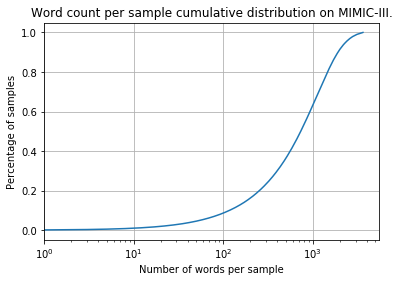

In [16]:
ax = (df_mimic
 .TEXT
 .apply(lambda x: len(x)).value_counts(normalize=True)
 .cumsum()
 .reset_index()
 .drop('index',axis=1)
 .plot(legend=False, logx=True)
);


ax.set_xlabel('Number of words per sample')
ax.set_ylabel('Percentage of samples')
ax.set_title('Word count per sample cumulative distribution on MIMIC-III.')

ax.grid()

ax.set_xlim(1)

fig = ax.get_figure()

fig.show()

##### Plot document length histogram

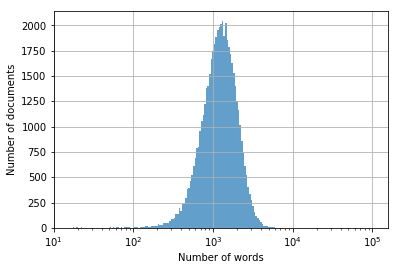

In [25]:
bin_list = np.logspace(1,5,num=200)

ax = (df_mimic
       .TEXT
       .apply(lambda x: len(x))
       .plot
       .hist(alpha=0.7, bins=bin_list,logx=True)
);

ax.set_xlabel('Number of words')
ax.set_ylabel('Number of documents')
ax.set_xlim(left=10e0)
ax.grid()

fig = ax.get_figure()
fig.show()

#### ICD stats

In [47]:
print('Total unique ICD codes:', df_mimic.ICD9_CODE.explode().unique().shape[0])

Total unique ICD codes: 6918


In [43]:
MIMIC_AVG = df_mimic.ICD9_CODE.explode().shape[0]/df_mimic.shape[0]

print('Average ICD codes per sample: %.2f' %MIMIC_AVG)

Average ICD codes per sample: 11.74


##### Plot ICD histogram

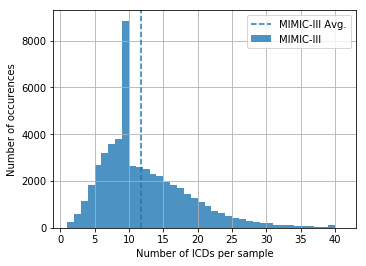

In [32]:
icd_bins= np.linspace(1,41,41,dtype='int32')

ax = (df_mimic
      .ICD9_CODE
      .apply(lambda x: len(x))
      .plot
      .hist(bins=icd_bins,alpha=0.8)
     )


# ax.set_xlabel('Número de CIDs por amostra')
# ax.set_ylabel('Número de ocorrências')
ax.set_xlabel('Number of ICDs per sample')
ax.set_ylabel('Number of occurences')

ax.axvline(MIMIC_AVG, linestyle='--', color='C0')

ax.legend(['MIMIC-III Avg.','MIMIC-III'])
ax.grid()


fig = ax.get_figure()


fig.subplots_adjust(left=0.15, right=0.85)


fig.show()

##### ICD imbalance

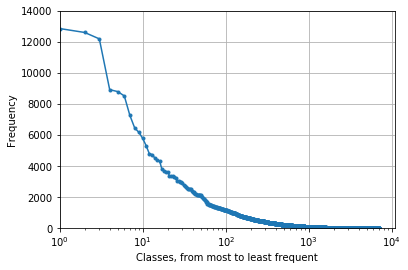

In [46]:
mimic_vals = hist_mimic.values.tolist()

plt.semilogx(range(len(mimic_vals)),mimic_vals,'.-')

plt.xlim(1)
plt.ylim(0,14000)

plt.grid()
plt.xlabel('Classes, from most to least frequent')
plt.ylabel('Frequency')
plt.show()

In [39]:
for index in [0,9,99,999]:
    print('%d th ICD:' %(index+1))
    print('MIMIC:', mimic_vals[index]/df_mimic.shape[0])
    print('')

1 th ICD:
MIMIC: 0.38022078069875953

10 th ICD:
MIMIC: 0.11672546565001328

100 th ICD:
MIMIC: 0.02226774401578089

1000 th ICD:
MIMIC: 0.0014794582906566519

